# Digital Tidsserie

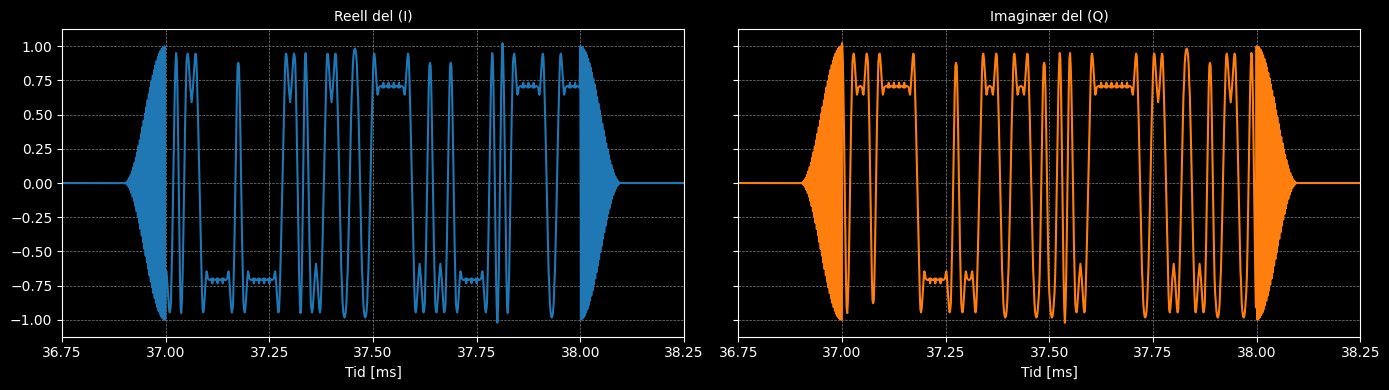

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Filnavn og lesing av data
filnavn = 'SimData/TxBurstData.bin'
burst_data = np.fromfile(filnavn, dtype=np.complex64)

# Definer samplingsfrekvens og tidsakse (ms)
samp_rate = 640e3
t = np.arange(len(burst_data)) / samp_rate * 1000  # Tidsakse, ms

# Filtrering for den innsnevrede tidsserien mellom 49 ms og 51 ms
start_time = 36.75  # Starttidspunkt for tidsvindu
end_time = 38.25    # Sluttidspunkt for tidsvindu
start_idx = np.searchsorted(t, start_time)  # Indeks for starttid
end_idx = np.searchsorted(t, end_time)      # Indeks for sluttid

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 4),sharey=True)  # Tre subplots, vertikal layout

axs[0].plot(t[start_idx:end_idx], np.real(burst_data[start_idx:end_idx]), color='tab:blue')
axs[0].set_title('Reell del (I)', fontsize=10)
axs[0].set_xlabel('Tid [ms]')
axs[0].set_xlim(start_time, end_time)  # Sett x-aksen til tidsvinduet
axs[0].set_xticks(np.arange(start_time, end_time+0.001, 0.25))  # Sett x-aksen til 0.5 ms intervaller
axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
t
axs[1].plot(t[start_idx:end_idx], np.imag(burst_data[start_idx:end_idx]), color='tab:orange')
axs[1].set_title('Imaginær del (Q)', fontsize=10)
axs[1].set_xlabel('Tid [ms]')
axs[1].set_xlim(start_time, end_time)  # Sett x-aksen til tidsvinduet
axs[1].set_xticks(np.arange(start_time, end_time+0.001, 0.25))  # Sett x-aksen til 0.5 ms intervaller
axs[1].grid(color='gray', linestyle='--', linewidth=0.5)

# Juster layout for bedre visning
plt.savefig('Figurer/Tx_tid.pdf',format="pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

# Målt Tidsserie

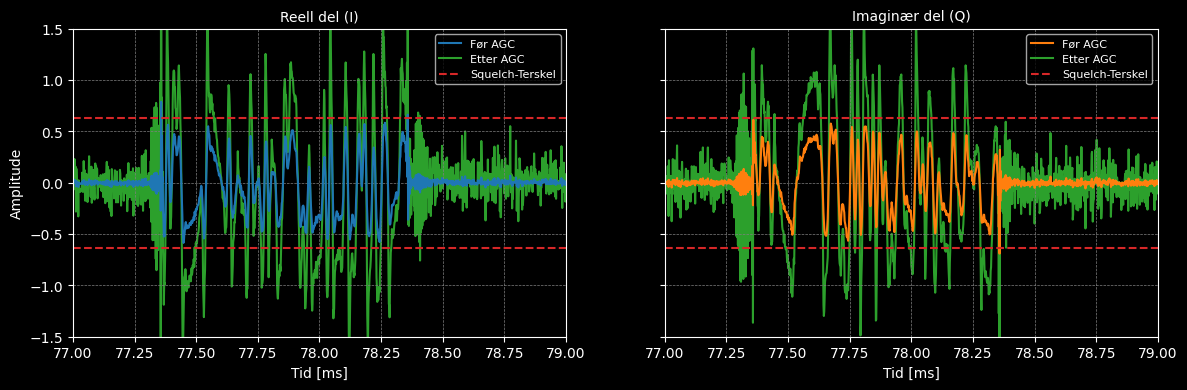

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Filnavn og lesing av data
filnavn = 'SimData/Rx_tidsserie.bin'
rx_data = np.fromfile(filnavn, dtype=np.complex64)

filnavn = 'SimData/Rx_tidsserie_AGC.bin'
rx_data_agc = np.fromfile(filnavn, dtype=np.complex64)

# Definer samplingsfrekvens og tidsakse (ms)
samp_rate = 640e3
t = np.arange(len(rx_data)) / samp_rate * 1000  # Tidsakse, ms

start_time = 2 + 75  # Starttidspunkt for tidsvindu
end_time = 4  + 75  # Sluttidspunkt for tidsvindu
start_idx = np.searchsorted(t, start_time)  # Indeks for starttid
end_idx = np.searchsorted(t, end_time)      # Indeks for sluttid

threshold_dB = -4
amplitude_threshold = 10**(threshold_dB/20)  # Konverter dB til lineær skala

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 4),sharey=True)  # Tre subplots, vertikal layout

axs[0].plot(t[start_idx:end_idx], np.real(rx_data[start_idx:end_idx]), color='tab:blue', zorder=2,label='Før AGC')
axs[0].plot(t[start_idx:end_idx], np.real(rx_data_agc[start_idx:end_idx]), color='tab:green', zorder=1,label='Etter AGC')
axs[0].axhline(y=amplitude_threshold, color='tab:red', linestyle='--', label='Squelch-Terskel')
axs[0].axhline(y=-amplitude_threshold, color='tab:red', linestyle='--')
axs[0].set_title('Reell del (I)', fontsize=10)
axs[0].set_xlabel('Tid [ms]')
axs[0].set_xlim(start_time, end_time)  # Sett x-aksen til tidsvinduet
axs[0].set_xticks(np.arange(start_time, end_time+0.001, 0.25))  # Sett x-aksen til 0.5 ms intervaller
axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
axs[0].legend(loc='upper right', fontsize=8)  
axs[0].set_ylabel('Amplitude', fontsize=10)
axs[0].set_ylim(-1.5, 1.5)  # Sett y-aksen til -1.5 til 1.5 for bedre visning

axs[1].plot(t[start_idx:end_idx], np.imag(rx_data[start_idx:end_idx]), color='tab:orange', zorder=2,label='Før AGC')
axs[1].plot(t[start_idx:end_idx], np.imag(rx_data_agc[start_idx:end_idx]), color='tab:green', zorder=1,label='Etter AGC')
axs[1].axhline(y=amplitude_threshold, color='tab:red', linestyle='--', label='Squelch-Terskel')
axs[1].axhline(y=-amplitude_threshold, color='tab:red', linestyle='--')
axs[1].set_title('Imaginær del (Q)', fontsize=10)
axs[1].set_xlabel('Tid [ms]')
axs[1].set_xlim(start_time, end_time)  # Sett x-aksen til tidsvinduet
axs[1].set_xticks(np.arange(start_time, end_time+0.001, 0.25))  # Sett x-aksen til 0.5 ms intervaller
axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
axs[1].legend(loc='upper right', fontsize=8)

plt.savefig('Figurer/Rx_tid.pdf', bbox_inches='tight')
plt.show()